# Face Mask Detection

 #### Import necessary libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Fetch the training Data

In [2]:
pwd

'C:\\Users\\erinr\\Edure\\Deep learning\\9.Capstone project\\Face mask detection'

In [3]:
import glob

In [4]:
with_mask = glob.glob('with mask1/*.jpg')
without_mask = glob.glob('without mask/*.jpg')

#### Find the number of images of all classes in the Training set

In [5]:
print(f'Number of images with mask is {len(with_mask)}')
print(f'Number of images without mask is {len(without_mask)}')

Number of images with mask is 1571
Number of images without mask is 1537


#### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [6]:
image = []
label = []

for i in with_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
for i in without_mask:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

#### Shuffle both image list and label list 

##### Use shuffle function from sklearn utils

In [9]:
from sklearn.utils import shuffle

In [10]:
image, label = shuffle(image, label, random_state=100)

In [11]:
len(image)

3108

#### Plot a few images from our shuffled list with its corresponding label 

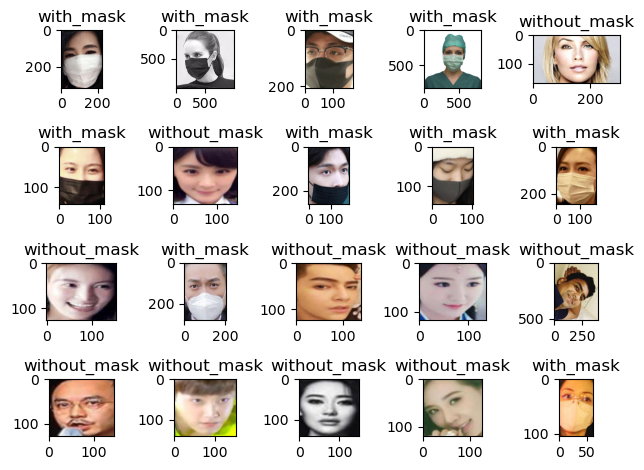

In [12]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('without_mask')
    else:
        plt.title('with_mask')
    plt.tight_layout()

#### Check the shape of the first 10 images in our list from training set

In [13]:
for i in range(10):
    print(image[i].shape)

(314, 223, 3)
(1000, 1000, 3)
(205, 173, 3)
(820, 820, 3)
(166, 303, 3)
(141, 110, 3)
(132, 148, 3)
(261, 185, 3)
(145, 103, 3)
(243, 170, 3)


#### Reshape the images

Also reassign them to new variables named X and convert them to a numpy array

In [14]:
from skimage.transform import resize

In [15]:
print(len(image))

3108


In [16]:
X = []
for n,i in enumerate(image):
    X.append(resize(i,(64,64,3)))
    print(n)
X = np.array(X)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#### create numpy arrays named y

In [17]:
y = np.array(label)

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.1)

#### Plot some of our reshaped images

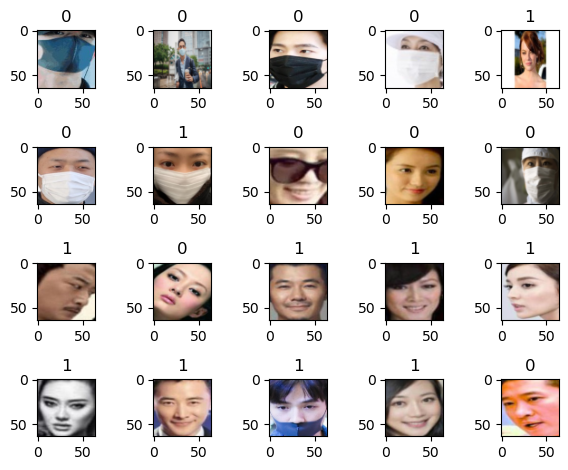

In [19]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(Xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

#### Check the shape of X_train and X_test and y_train and y_test

In [20]:
print(f'Shape of Xtrain is:',Xtrain.shape)
print(f'Shape of Xtest is:', Xtest.shape)
print(f'Shape of ytrain is:',y_train.shape)
print(f'Shape of ytest is:',y_test.shape)

Shape of Xtrain is: (2797, 64, 64, 3)
Shape of Xtest is: (311, 64, 64, 3)
Shape of ytrain is: (2797,)
Shape of ytest is: (311,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [21]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.Input(shape=(64, 64, 3)),  
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])


#### Compile the model

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Check the summary of our model

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model.

In [24]:
model.fit(Xtrain, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.7621 - loss: 0.4853 - val_accuracy: 0.9179 - val_loss: 0.2448
Epoch 2/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9284 - loss: 0.1888 - val_accuracy: 0.9429 - val_loss: 0.1751
Epoch 3/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9440 - loss: 0.1613 - val_accuracy: 0.9143 - val_loss: 0.2480
Epoch 4/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9388 - loss: 0.1590 - val_accuracy: 0.9393 - val_loss: 0.1578
Epoch 5/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9590 - loss: 0.1150 - val_accuracy: 0.9357 - val_loss: 0.1855
Epoch 6/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9603 - loss: 0.1111 - val_accuracy: 0.9500 - val_loss: 0.1529
Epoch 7/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9703 - loss: 0.0894 - val_accuracy: 0.9411 - val_loss: 0.1462
Epoch 8/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9754 - loss: 0.0729 - val_accuracy: 0.9518 - v

#### Evaluate the model

In [25]:
model.evaluate(Xtrain, y_train)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9987 - loss: 0.0099


[0.041481997817754745, 0.9896317720413208]

#### Make predictions with X_test

In [26]:
ypred = model.predict(Xtest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [27]:
y_pred = [1 if i>.5 else 0 for i in ypred]

#### Plot X_test with label from our prediction

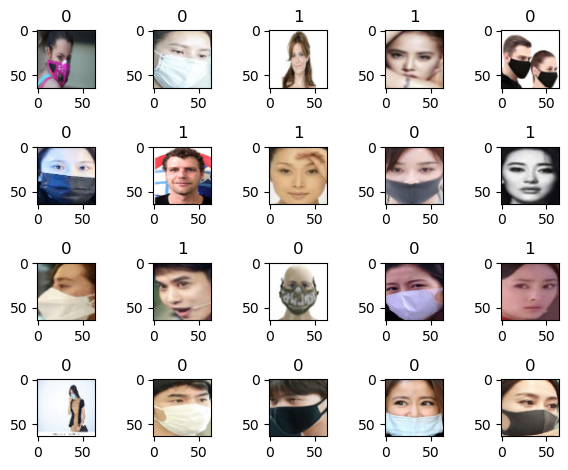

In [28]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(Xtest[i])
    plt.title(y_test[i])
    plt.tight_layout()

#### Visualise confusion matrix on a heatmap

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

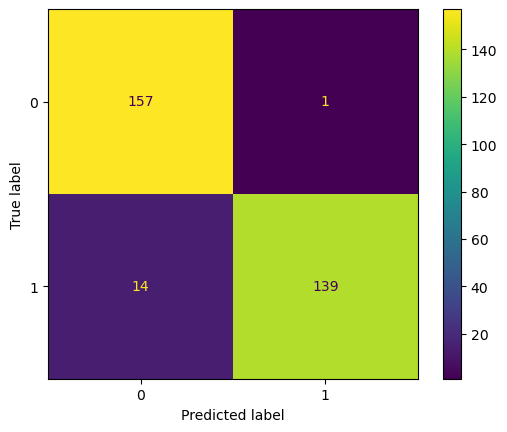

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Thankyou